In [1]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.metrics import *
from tensorflow.keras import Input
from tensorflow.keras import Sequential
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import time
import os
import pydot
import graphviz
from keras.utils.vis_utils import plot_model

# 1.

In [2]:
file = open('PS4data/data.txt').readlines()
data = []
for line in file:
    row = line.split(" ")
    row[len(row)-1] = row[len(row)-1][:-1]
    row = np.array(row).astype('float32')
    data.append(row)
    
data = np.array(data)

# randomize order for averages
np.random.shuffle(data)

In [3]:
X_train = data[0:7000,:50]
X_train = X_train.reshape(len(X_train),len(X_train[0]),1)

y_train = data[0:7000,-1:]

X_test = data[7000:,:50]
X_test = X_test.reshape(len(X_test),len(X_test[0]),1)

y_test = data[7000:,-1:]

# 2.

MSE would be appropriate for a single neuron in a time-series regression task.

# 3.

In [4]:
inputs = Input(shape=(50,1))
# RNN1 = SimpleRNN(15, return_sequences=True)(inputs)
# RNN2 = SimpleRNN(15)(RNN1)
# outputs = Dense(1,activation='linear')(RNN2)
# LSTM1 = LSTM(15, return_sequences=True)(inputs)
# LSTM2 = LSTM(15)(LSTM1)
# outputs = Dense(1,activation='linear')(LSTM2)
GRU1 = LSTM(15, return_sequences=True)(inputs)
GRU2 = LSTM(15)(GRU1)
outputs = Dense(1,activation='linear')(GRU2)
model = Model(inputs = inputs, outputs = outputs)
model.compile( optimizer="adam" , loss="mse")
model.summary()

model.fit(X_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 50, 15)            1020      
                                                                 
 lstm_1 (LSTM)               (None, 15)                1860      
                                                                 
 dense (Dense)               (None, 1)                 16        
                                                                 
Total params: 2,896
Trainable params: 2,896
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
50/50 [==============================] - 4s 23ms/step - loss: 0.1054 - val_loss: 0.0687
Epoch 2/15
50/50 [==============================] - 1s 19ms/step - loss: 0.0581 - val_loss: 

In [5]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 1s 6ms/step - loss: 0.0032


0.0032304769847542048

# 4.

In [6]:
output_set = X_test[0:5,:,:]

predictions = model.predict(output_set)

for i in range(len(predictions)):
    print(f"Record {i+1} Prediction: {predictions[i]}")

Record 1 Prediction: [0.54533917]
Record 2 Prediction: [0.41033745]
Record 3 Prediction: [0.07668296]
Record 4 Prediction: [0.57921374]
Record 5 Prediction: [0.20172675]


In [7]:
predictions = predictions.reshape(5,1,1)
output_set = np.concatenate((output_set,predictions),axis=1)

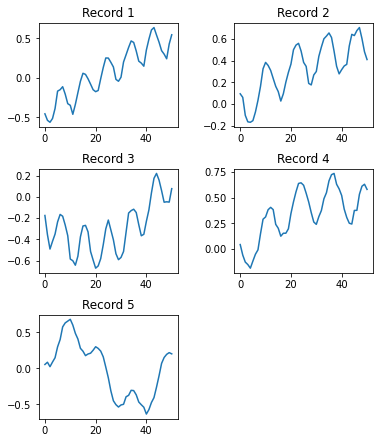

In [8]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2)
ax6.set_visible(False)
ax1.set_title('Record 1')
ax2.set_title('Record 2')
ax3.set_title('Record 3')
ax4.set_title('Record 4')
ax5.set_title('Record 5')

plt.subplots_adjust(hspace=0.4, top=1.5, wspace=0.4)

ax1.plot(output_set[0,:,:])
ax2.plot(output_set[1,:,:])
ax3.plot(output_set[2,:,:])
ax4.plot(output_set[3,:,:])
ax5.plot(output_set[4,:,:])

# 5.

In [9]:
output_set = X_test[0:5,:,:]

for i in range(5):
    pred = model.predict(output_set[:,i:,:].reshape(5,50,1))
    pred = pred.reshape(5,1,1)
    output_set = np.concatenate((output_set,pred),axis=1)    

# 6.

In [10]:
for i in range(5):
    print(f'Record {i+1} Prediction: {output_set[i,50:,0]}')

Record 1 Prediction: [0.54533917 0.67452353 0.7291472  0.6999103  0.6112853 ]
Record 2 Prediction: [0.41033745 0.3656233  0.37270296 0.42659968 0.5082414 ]
Record 3 Prediction: [0.07668296 0.22703989 0.3743115  0.47037762 0.49324232]
Record 4 Prediction: [0.57921374 0.48796856 0.38651204 0.30639374 0.26832467]
Record 5 Prediction: [0.20172675 0.2033856  0.23694302 0.31059092 0.4140715 ]


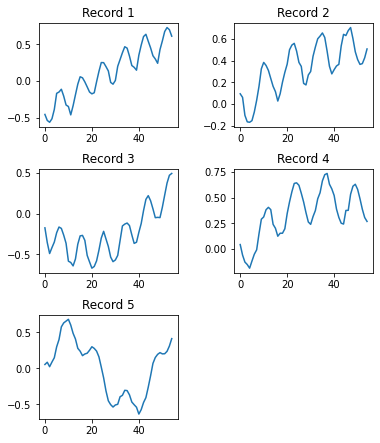

In [11]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2)
ax6.set_visible(False)
ax1.set_title('Record 1')
ax2.set_title('Record 2')
ax3.set_title('Record 3')
ax4.set_title('Record 4')
ax5.set_title('Record 5')

plt.subplots_adjust(hspace=0.4, top=1.5, wspace=0.4)

ax1.plot(output_set[0,:,:])
ax2.plot(output_set[1,:,:])
ax3.plot(output_set[2,:,:])
ax4.plot(output_set[3,:,:])
ax5.plot(output_set[4,:,:])

# 7.

In [12]:
X_train = data[0:7000,:46]
X_train = X_train.reshape(len(X_train),len(X_train[0]),1)

y_train = data[0:7000,46:]

X_test = data[7000:,:46]
X_test = X_test.reshape(len(X_test),len(X_test[0]),1)

y_test = data[7000:,46:]

In [13]:
inputs = Input(shape=(46,1))
# RNN1 = SimpleRNN(15, return_sequences=True)(inputs)
# RNN2 = SimpleRNN(15)(RNN1)
# # outputs = Dense(5,activation='linear')(RNN2)
# LSTM1 = LSTM(15, return_sequences=True)(inputs)
# LSTM2 = LSTM(15)(LSTM1)
# outputs = Dense(5,activation='linear')(LSTM2)
GRU1 = LSTM(15, return_sequences=True)(inputs)
GRU2 = LSTM(15)(GRU1)
outputs = Dense(5,activation='linear')(GRU2)
model = Model(inputs = inputs, outputs = outputs)
model.compile( optimizer="adam" , loss="mse")
model.summary()

model.fit(X_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 46, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 46, 15)            1020      
                                                                 
 lstm_3 (LSTM)               (None, 15)                1860      
                                                                 
 dense_1 (Dense)             (None, 5)                 80        
                                                                 
Total params: 2,960
Trainable params: 2,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
50/50 [==============================] - 3s 23ms/step - loss: 0.1043 - val_loss: 0.0839
Epoch 2/15
50/50 [==============================] - 1s 11ms/step - loss: 0.0711 - val_loss

In [14]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 5ms/step - loss: 0.0256


0.02560286968946457

# 8.

In [15]:
output_set = X_test[:5,:,:]
predictions = model.predict(output_set)
for i in range(5):
    print(f'Record {i+1} Prediction: {predictions[i]}')

Record 1 Prediction: [0.499303   0.4553861  0.49917635 0.5243127  0.5892181 ]
Record 2 Prediction: [0.42619777 0.40735134 0.38506976 0.4347081  0.4215461 ]
Record 3 Prediction: [0.05868056 0.07277567 0.09128436 0.14617912 0.19082746]
Record 4 Prediction: [0.37454593 0.36782178 0.32569417 0.37110308 0.35721165]
Record 5 Prediction: [-0.12627792 -0.06171142  0.03004089  0.10615268  0.16627061]


In [16]:
predictions = predictions.reshape(5,5,1)
output_set = np.concatenate((output_set,predictions),axis=1)

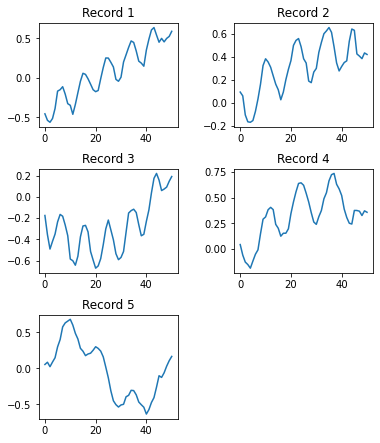

In [17]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2)
ax6.set_visible(False)
ax1.set_title('Record 1')
ax2.set_title('Record 2')
ax3.set_title('Record 3')
ax4.set_title('Record 4')
ax5.set_title('Record 5')

plt.subplots_adjust(hspace=0.4, top=1.5, wspace=0.4)

ax1.plot(output_set[0,:,:])
ax2.plot(output_set[1,:,:])
ax3.plot(output_set[2,:,:])
ax4.plot(output_set[3,:,:])
ax5.plot(output_set[4,:,:])

# 9.

In [18]:
alldatafromfile = data.reshape(len(data),len(data[0]),1)

X_train = data[0:7000,:46]
X_train = X_train.reshape(len(X_train),len(X_train[0]),1)

X_test = data[7000:,:46]
X_test = X_test.reshape(len(X_test),len(X_test[0]),1)



step_count = 51 - 5 # which implies X[0:46]
Y_outputs = 5
Y_seq = np.empty( (10000, step_count, Y_outputs) )
# I had to modify this for it to work properly not sure why but if there are any problems that might be why
for next in range(1, Y_outputs+1):
# for all rows and for all time steps, set Y output vector
    Y_seq[ :, :, next-1 ] = alldatafromfile[ :, next:next+step_count, 0]
    
y_test = Y_seq[7000:]
y_train = Y_seq[:7000]

In [19]:
inputs = Input(shape=(46,1))
# RNN1 = SimpleRNN(15, return_sequences=True)(inputs)
# RNN2 = SimpleRNN(15, return_sequences=True)(RNN1)
# outputs = Dense(5,activation='linear')(RNN2)
# LSTM1 = LSTM(15, return_sequences=True)(inputs)
# LSTM2 = LSTM(15, return_sequences=True)(LSTM1)
# outputs = Dense(5,activation='linear')(LSTM2)
GRU1 = LSTM(15, return_sequences=True)(inputs)
GRU2 = LSTM(15, return_sequences=True)(GRU1)
outputs = Dense(5,activation='linear')(GRU2)
model = Model(inputs = inputs, outputs = outputs)
model.compile( optimizer="adam" , loss="mse")
model.summary()

model.fit(X_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 46, 1)]           0         
                                                                 
 lstm_4 (LSTM)               (None, 46, 15)            1020      
                                                                 
 lstm_5 (LSTM)               (None, 46, 15)            1860      
                                                                 
 dense_2 (Dense)             (None, 46, 5)             80        
                                                                 
Total params: 2,960
Trainable params: 2,960
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
50/50 [==============================] - 3s 22ms/step - loss: 0.1222 - val_loss: 0.0994
Epoch 2/15
50/50 [==============================] - 1s 11ms/step - loss: 0.0802 - val_loss

In [20]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 1s 5ms/step - loss: 0.0261


0.02612566575407982

# 10.

In [21]:
output_set = X_test[:5,:,:]
prediction = model.predict(output_set[:,:,:])
for i in range(5):
    print(f'Record {i+1} Prediction: {prediction[i][45]}')

Record 1 Prediction: [0.2966719  0.2672277  0.35887152 0.43770996 0.51524043]
Record 2 Prediction: [0.55558896 0.50541395 0.45110112 0.3774215  0.3359748 ]
Record 3 Prediction: [0.06859723 0.02087763 0.07534627 0.17128691 0.23628953]
Record 4 Prediction: [0.5178073  0.57429755 0.58430356 0.46309486 0.36348635]
Record 5 Prediction: [0.00379596 0.06098592 0.04908066 0.03163444 0.02486821]


In [22]:
prediction = np.squeeze(prediction[:,45])
prediction = prediction.reshape(5,5,1)

In [23]:
output_set = np.concatenate((output_set,prediction),axis=1)

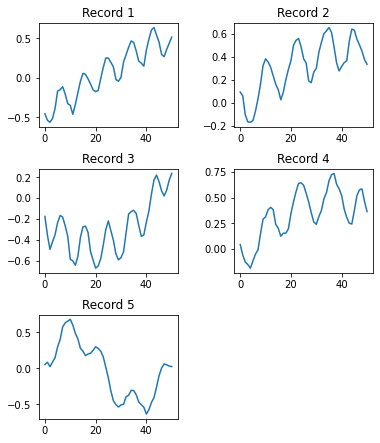

In [24]:
fig, ((ax1,ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(3,2)
ax6.set_visible(False)
ax1.set_title('Record 1')
ax2.set_title('Record 2')
ax3.set_title('Record 3')
ax4.set_title('Record 4')
ax5.set_title('Record 5')

plt.subplots_adjust(hspace=0.4, top=1.5, wspace=0.4)

ax1.plot(output_set[0,:,:])
ax2.plot(output_set[1,:,:])
ax3.plot(output_set[2,:,:])
ax4.plot(output_set[3,:,:])
ax5.plot(output_set[4,:,:])